In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('data/new_train.csv')
test_data = pd.read_csv('data/new_test.csv')

print train_data.shape
display(train_data.head(1))
# display(train_data.info())

print test_data.shape
display(test_data.head(1))
# display(test_data.info())
train_length = train_data.shape[0]

(1460, 270)


,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,SalePrice
0,0.140357,0.032874,0.693147,0.0,0.693147,0.693147,0.693147,0.693147,0.510826,0.405465,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,12.247699


(1459, 269)


,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,0.184032,0.047118,0.693147,0.0,0.693147,0.693147,0.693147,0.693147,0.367725,0.485508,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1461


In [3]:
def float_range(start,stop,nums):
    ''' Computes a range of floating value.
        
        Input:
            start (float)  : Start value.
            end   (float)  : End value
            nums (integer): Number of values
        
        Output:
            A list of floats
    '''
    return [start+float(i)*(stop-start)/(float(nums)-1) for i in range(nums)]

In [4]:
train_id = train_data['Id']
train_Y = train_data['SalePrice']
train_data.drop(['Id', 'SalePrice'], axis=1, inplace=True)
train_X = train_data

test_Id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)
test_X = test_data

# Gradient Boosting & Parameter Tuning

Ref: [Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions

Baseline model fitting method

In [6]:
def model_fit(regressor, train_x, train_y, performCV=True, 
              printFeatureImportance=True, cv_folds=5):
    
    # fir the train data
    regressor.fit(train_x, train_y)
    
    # Predict training set
    train_predictions = regressor.predict(train_x)

    mse = metrics.mean_squared_error(train_y, regressor.predict(train_x))
    print "Model training report:"
    print("MSE: %.4f" % mse)
    
    # Perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(regressor, train_x, train_y, 
                                               cv=cv_folds, scoring='r2')
        print "CV Score : Mean = %.7g | Std = %.7g | Min = %.7g | Max = %.7g" % \
                (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    
    # Print Feature Importance
    if printFeatureImportance:
        feature_importances = pd.Series(regressor.feature_importances_, train_x.columns.values)
        feature_importances = feature_importances.sort_values(ascending=False)
        feature_importances= feature_importances.head(80)
        feature_importances.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    
    return regressor, feature_importances

Model training report:
MSE: 0.0063
CV Score : Mean = 0.9091749 | Std = 0.005910872 | Min = 0.9004514 | Max = 0.9177318


(GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False), LotArea                    0.056422
 Now_YearBuilt              0.040646
 OverallGrade               0.036550
 AllSF-s2                   0.035379
 Now_GarageYrBlt            0.033023
 Functional                 0.030786
 AllSF-sq                   0.028168
 BsmtUnfSF                  0.026732
 BsmtFinSF1                 0.025558
 1stFlrSF                   0.025063
 Now_YearRemodAdd           0.021969
 2ndFlrSF                   0.020056
 AllSF-s3                   0.019510
 OverallCond                0.016849
 TotalBath-sq               0.016682
 GrLivArea                  0.016157
 MSZoning_C (all)           0.015974
 Ex

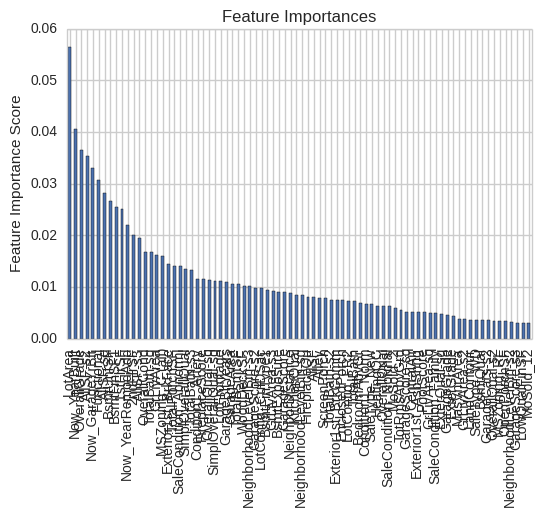

In [7]:
regressor = GradientBoostingRegressor(random_state=10)
model_fit(regressor, train_X, train_Y)

## Parameters Tuning Plan

The overall parameters can be divided into 3 categories:

- Tree-Specific Parameters: These affect each individual tree in the model.
- Boosting Parameters: These affect the boosting operation in the model.
- Miscellaneous Parameters: Other parameters for overall functioning.

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/tree-infographic.png)

In `GradientBoostingRegressor`:

```
class sklearn.ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=1e-07, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
```
- Tree-Specific Parameters
  - `max_depth`:The maximum depth of a tree. Used to ** control over-fitting ** as higher depth will allow model to learn relations very specific to a particular sample.Should be ** tuned using CV **.
  - `min_samples_split`:Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.Used to ** control over-fitting **. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.Too high values can lead to under-fitting hence, it should be ** tuned using CV **.
  - `min_samples_leaf`:Defines the minimum samples (or observations) required in a terminal node or leaf.Used to control over-fitting similar to min_samples_split.Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
  - `min_weight_fraction_leaf`:Similar to `min_samples_leaf` but defined as a fraction of the total number of observations instead of an integer.
  
- Boosting Parameters
  - `learning_rate`: This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
  - `n_estimators`:The number of sequential trees to be modeled.Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
  - `subsample`:The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
  
- Miscellaneous Parameters
  - `loss`:It refers to the loss function to be minimized in each split.It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
  - `init`:This affects initialization of the output.This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
  - `random_state`:The random number seed so that same random numbers are generated every time.This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
  - `verbose`:The type of output to be printed when the model fits. The different values can be:
    - 0: no output generated (default) 
    - 1: output generated for trees in certain intervals
    - `>`1: output generated for all trees
  - `warm_start`:This parameter has an interesting application and can help a lot if used judicially.Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
  - `presort`:Select whether to presort data for faster splits.It makes the selection automatically by default but it can be changed if needed.
  

## Paramters tuning approach

1. Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
2. Determine the optimum number of trees for this learning rate. This should range around 40-70. ** Remember to choose a value on which your system can work fairly fast **. This is because it will be used for testing various scenarios and determining the tree parameters.
3. Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
4. Lower the learning rate and increase the estimators proportionally to get more robust models.

### 1. Choose a relatively high learning_rate,optimum `n_estimators`

In [7]:
from sklearn.grid_search import GridSearchCV   # Perforing grid search

In [10]:
param_test1 = {'n_estimators':range(100,300,20)}

regressor = GradientBoostingRegressor(
                learning_rate=0.1, subsample=0.8,
                min_samples_split=20, min_samples_leaf=5, 
                max_depth=8, random_state=10, max_features='sqrt',
                verbose=0)

gsearch1 = GridSearchCV(estimator = regressor, param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_X, train_Y)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.90438, std: 0.00889, params: {'n_estimators': 100},
  mean: 0.90434, std: 0.00845, params: {'n_estimators': 120},
  mean: 0.90445, std: 0.00883, params: {'n_estimators': 140},
  mean: 0.90449, std: 0.00872, params: {'n_estimators': 160},
  mean: 0.90467, std: 0.00877, params: {'n_estimators': 180},
  mean: 0.90437, std: 0.00928, params: {'n_estimators': 200},
  mean: 0.90441, std: 0.00924, params: {'n_estimators': 220},
  mean: 0.90446, std: 0.00928, params: {'n_estimators': 240},
  mean: 0.90461, std: 0.00934, params: {'n_estimators': 260},
  mean: 0.90457, std: 0.00924, params: {'n_estimators': 280}],
 {'n_estimators': 180},
 0.90467400580505752)

for learning_rate=0.1, we have n_estimators = 180

## 2.Fix learning rate and number of estimators for tuning tree-based parameters

Now lets move onto tuning the tree parameters. I plan to do this in following stages:

1. Tune `max_depth` and `min_samples_split`
2. Tune `min_samples_leaf`
3. Tune `max_features`

The order of tuning variables should be decided carefully. You should **take the variables with a higher impact on outcome first**. For instance, max_depth and min_samples_split have a significant impact and we’re tuning those first.

In [20]:
param_test2 = {'max_depth':range(1,10,1), 'min_samples_split': range(1, 30, 1)}

regressor = GradientBoostingRegressor(
                learning_rate=0.1, subsample=0.8,
                min_samples_leaf=5, n_estimators=180,
                random_state=10, max_features='sqrt',
                verbose=0)

gsearch2 = GridSearchCV(estimator = regressor, param_grid = param_test2, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_X, train_Y)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88780, std: 0.00884, params: {'min_samples_split': 1, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 2, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 3, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 4, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 5, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 6, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 7, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 8, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 9, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 10, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 11, 'max_depth': 1},
  mean: 0.88780, std: 0.00884, params: {'min_samples_split': 12, 'max_depth': 1},
  mean: 0.88780, std: 0.0

{ 
  'learning_rate':0.1 , 
  'n_estimators': 180, 
  'max_depth': 3, 
  'min_samples_split': 27
}

In [24]:
param_test3 = {'min_samples_leaf':range(1,20,1), 'max_features':range(50,100,5)}

regressor = GradientBoostingRegressor(
                learning_rate=0.1, n_estimators=180,
                max_depth=3, min_samples_split=27,
                subsample=0.8,
                random_state=10,
                verbose=0)

gsearch3 = GridSearchCV(estimator = regressor, param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_X, train_Y)

gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.91243, std: 0.00502, params: {'max_features': 50, 'min_samples_leaf': 1},
  mean: 0.91260, std: 0.01198, params: {'max_features': 50, 'min_samples_leaf': 2},
  mean: 0.91346, std: 0.01088, params: {'max_features': 50, 'min_samples_leaf': 3},
  mean: 0.91139, std: 0.01164, params: {'max_features': 50, 'min_samples_leaf': 4},
  mean: 0.91095, std: 0.01037, params: {'max_features': 50, 'min_samples_leaf': 5},
  mean: 0.90964, std: 0.01412, params: {'max_features': 50, 'min_samples_leaf': 6},
  mean: 0.90868, std: 0.01166, params: {'max_features': 50, 'min_samples_leaf': 7},
  mean: 0.90868, std: 0.00836, params: {'max_features': 50, 'min_samples_leaf': 8},
  mean: 0.90830, std: 0.00722, params: {'max_features': 50, 'min_samples_leaf': 9},
  mean: 0.90829, std: 0.01001, params: {'max_features': 50, 'min_samples_leaf': 10},
  mean: 0.90734, std: 0.00887, params: {'max_features': 50, 'min_samples_leaf': 11},
  mean: 0.90784, std: 0.00884, params: {'max_features': 50, 'min_samples_l

```
{
    'learning_rate':0.1 , 
    'n_estimators': 180, 
    'max_depth': 3, 
    'min_samples_split': 27,
    'min_samples_leaf': 1,
    'max_features':60
}
```

## 3. Tuning subsample and making models with lower learning rate

In [30]:
param_test4 = {'subsample':[x / 100.0 for x in range(50, 100, 5)]}

regressor = GradientBoostingRegressor(
                learning_rate=0.1, n_estimators=180,
                max_depth=3, min_samples_split=27,
                min_samples_leaf=1,
                max_features = 60,
                random_state=10,
                verbose=0)

gsearch4 = GridSearchCV(estimator = regressor, param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_X, train_Y)

gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.90765, std: 0.00753, params: {'subsample': 0.5},
  mean: 0.91202, std: 0.00576, params: {'subsample': 0.55},
  mean: 0.90750, std: 0.00675, params: {'subsample': 0.6},
  mean: 0.91231, std: 0.00572, params: {'subsample': 0.65},
  mean: 0.90946, std: 0.00687, params: {'subsample': 0.7},
  mean: 0.91094, std: 0.00596, params: {'subsample': 0.75},
  mean: 0.91570, std: 0.00674, params: {'subsample': 0.8},
  mean: 0.91174, std: 0.00547, params: {'subsample': 0.85},
  mean: 0.91100, std: 0.00664, params: {'subsample': 0.9},
  mean: 0.91316, std: 0.00734, params: {'subsample': 0.95}],
 {'subsample': 0.8},
 0.9157009927195976)

```
{
    'learning_rate':0.1 , 
    'n_estimators': 180, 
    'max_depth': 3, 
    'min_samples_split': 27,
    'min_samples_leaf': 1,
    'max_features':60,
    'subsample': 0.8
}
```

Decrease the learning rate and increase the number of trees.

In [51]:
param_test5 = {'learning_rate':[0.1, 0.03, 0.01, 0.005, 0.001],
               'n_estimators':range(180, 1000,100)}

regressor = GradientBoostingRegressor(
                max_depth=3, min_samples_split=27,
                min_samples_leaf=1,
                max_features = 60,
                subsample = 0.8,
                random_state=10,
                verbose=0)

gsearch5 = GridSearchCV(estimator = regressor, param_grid = param_test5, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_X, train_Y)

gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.91570, std: 0.00674, params: {'n_estimators': 180, 'learning_rate': 0.1},
  mean: 0.91598, std: 0.00583, params: {'n_estimators': 280, 'learning_rate': 0.1},
  mean: 0.91480, std: 0.00575, params: {'n_estimators': 380, 'learning_rate': 0.1},
  mean: 0.91422, std: 0.00538, params: {'n_estimators': 480, 'learning_rate': 0.1},
  mean: 0.91343, std: 0.00571, params: {'n_estimators': 580, 'learning_rate': 0.1},
  mean: 0.91311, std: 0.00588, params: {'n_estimators': 680, 'learning_rate': 0.1},
  mean: 0.91282, std: 0.00576, params: {'n_estimators': 780, 'learning_rate': 0.1},
  mean: 0.91218, std: 0.00550, params: {'n_estimators': 880, 'learning_rate': 0.1},
  mean: 0.91150, std: 0.00548, params: {'n_estimators': 980, 'learning_rate': 0.1},
  mean: 0.90337, std: 0.00654, params: {'n_estimators': 180, 'learning_rate': 0.03},
  mean: 0.91048, std: 0.00608, params: {'n_estimators': 280, 'learning_rate': 0.03},
  mean: 0.91264, std: 0.00616, params: {'n_estimators': 380, 'learning_rat

Paramters Micro-tuning

In [64]:
param_test6 = {'learning_rate':float_range(0.07, 0.12, 6),
               'n_estimators':range(180, 380,20),
               'max_depth':[3],
               'min_samples_split':[27],
               'min_samples_leaf':[1],
               'max_features':[56,57,58,59,60,61,62,63,64],
               'subsample':[0.78,0.79,0.80,0.81,0.82]}

regressor = GradientBoostingRegressor(
                random_state=10,
                verbose=0)

gsearch6 = GridSearchCV(estimator = regressor, param_grid = param_test6, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_X, train_Y)

gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.91120, std: 0.00693, params: {'subsample': 0.78, 'learning_rate': 0.07, 'min_samples_leaf': 1, 'n_estimators': 180, 'min_samples_split': 27, 'max_features': 56, 'max_depth': 3},
  mean: 0.91094, std: 0.00684, params: {'subsample': 0.79, 'learning_rate': 0.07, 'min_samples_leaf': 1, 'n_estimators': 180, 'min_samples_split': 27, 'max_features': 56, 'max_depth': 3},
  mean: 0.91216, std: 0.00683, params: {'subsample': 0.8, 'learning_rate': 0.07, 'min_samples_leaf': 1, 'n_estimators': 180, 'min_samples_split': 27, 'max_features': 56, 'max_depth': 3},
  mean: 0.91138, std: 0.00505, params: {'subsample': 0.81, 'learning_rate': 0.07, 'min_samples_leaf': 1, 'n_estimators': 180, 'min_samples_split': 27, 'max_features': 56, 'max_depth': 3},
  mean: 0.91284, std: 0.00547, params: {'subsample': 0.82, 'learning_rate': 0.07, 'min_samples_leaf': 1, 'n_estimators': 180, 'min_samples_split': 27, 'max_features': 56, 'max_depth': 3},
  mean: 0.91119, std: 0.00711, params: {'subsample': 0.78, 'l

## Final model

Model training report:
MSE: 0.0055
CV Score : Mean = 0.9162799 | Std = 0.005074165 | Min = 0.9135718 | Max = 0.9264235


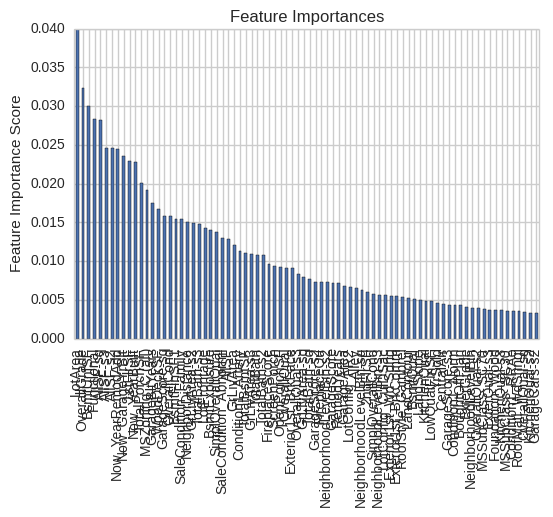

In [8]:
regressor = GradientBoostingRegressor(
                learning_rate=0.09,
                n_estimators=180,
                max_depth=3, 
                max_features = 60,
                min_samples_leaf=1,
                min_samples_split=27,
                subsample = 0.82,
                random_state=10,
                verbose=0)
regressor, feature_importances = model_fit(regressor, train_X, train_Y)

In [75]:
gbm_predictions = regressor.predict(test_X)
gbm_predictions = np.power(np.e, gbm_predictions) - 1

submission = pd.DataFrame({
        "Id": test_Id,
        "SalePrice": gbm_predictions
    })

submission.to_csv("result/gbm_param_tune_predictions_2_10.csv", index=False)

print "Done."

Done.
